In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

In [40]:
as_data = pd.read_csv('Asylum Data/asylumdata.csv',low_memory=False)

as_data.head()

,Country / territory of asylum/residence,Origin,Year,Month,Value
0,Australia,Afghanistan,1999,January,8
1,Australia,Afghanistan,1999,February,10
2,Australia,Afghanistan,1999,March,25
3,Australia,Afghanistan,1999,April,25
4,Australia,Afghanistan,1999,May,7


In [5]:
aslymData = as_data[as_data['Value']!='*' ]

In [6]:
aslymData['Value'] = pd.to_numeric(aslymData['Value'], errors='coerce')

<ipython-input-6-6b86cb6d32b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aslymData['Value'] = pd.to_numeric(aslymData['Value'], errors='coerce')


In [23]:
aslymData_cntry=aslymData.groupby('Country / territory of asylum/residence')['Value'].sum()

In [24]:
aslymData_cntry

Country / territory of asylum/residence
Albania                                                    6972
Australia                                                222203
Austria                                                  480567
Belgium                                                  396274
Bosnia and Herzegovina                                     2665
Bulgaria                                                  79533
Canada                                                   544638
Croatia                                                    8852
Cyprus                                                    65211
Czech Rep.                                                78120
Denmark                                                  125047
Estonia                                                     896
Finland                                                   94226
France                                                  1041790
Germany                                                 2432463


In [25]:
aslymData_cntry2 = aslymData_cntry.sort_values(ascending=False)[:25]

In [11]:
aslymData_cntry2

Country / territory of asylum/residence
Germany                                                 2432463
France                                                  1041790
USA (INS/DHS)                                           1000394
United Kingdom of Great Britain and Northern Ireland     844289
Sweden                                                   713837
Turkey                                                   666235
Italy                                                    574709
USA (EOIR)                                               571788
Canada                                                   544638
Austria                                                  480567
Belgium                                                  396274
Switzerland                                              388371
Netherlands                                              383738
Hungary                                                  326554
Greece                                                   315445


In [26]:
bars = aslymData_cntry2.index
y_pos = np.arange(len(bars))
y_pos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

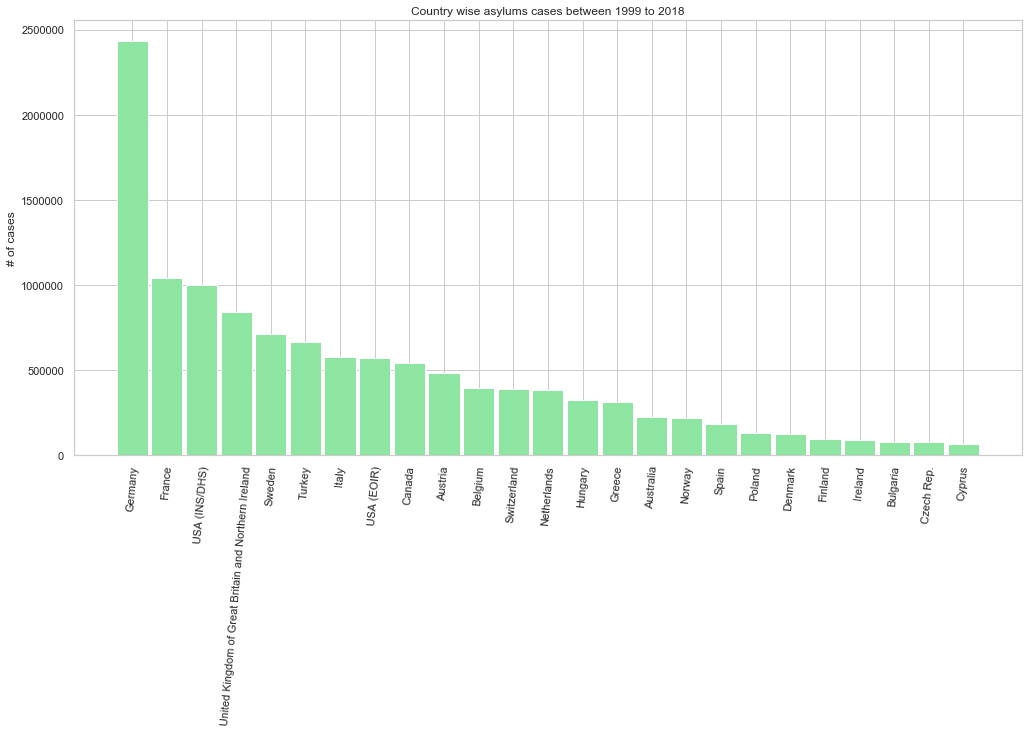

In [27]:
fig = plt.figure(figsize=(17,8))
plt.bar(y_pos,aslymData_cntry2, color='g',align='center', width=0.9)
plt.title("Country wise asylums cases between 1999 to 2018")
plt.xticks(y_pos, bars,rotation=85)
plt.ylabel("# of cases")
plt.show()


In [28]:
aslymData_origin=aslymData.groupby('Origin')['Value'].sum()

In [29]:
aslymData_origin

Origin
Afghanistan       1109202
Albania            217228
Algeria            141115
Andorra                 9
Angola              53649
                   ...   
Viet Nam            66377
Western Sahara       4555
Yemen               19260
Zambia               1046
Zimbabwe            56924
Name: Value, Length: 205, dtype: int64

In [30]:
aslymData_orig_ml = aslymData_origin.sort_values(ascending=False)[:25]

In [31]:
aslymData_orig_ml

Origin
Syrian Arab Rep.                        1177110
Afghanistan                             1109202
Iraq                                    1018024
Serbia and Kosovo: S/RES/1244 (1999)     643430
China                                    457952
Russian Federation                       420165
Iran (Islamic Rep. of)                   418996
Pakistan                                 393807
Nigeria                                  342625
Somalia                                  323476
Eritrea                                  286890
Turkey                                   278210
Mexico                                   218756
Albania                                  217228
India                                    191262
El Salvador                              184222
Bangladesh                               181758
Sri Lanka                                181180
Various/unknown                          164695
Dem. Rep. of the Congo                   154254
Georgia                          

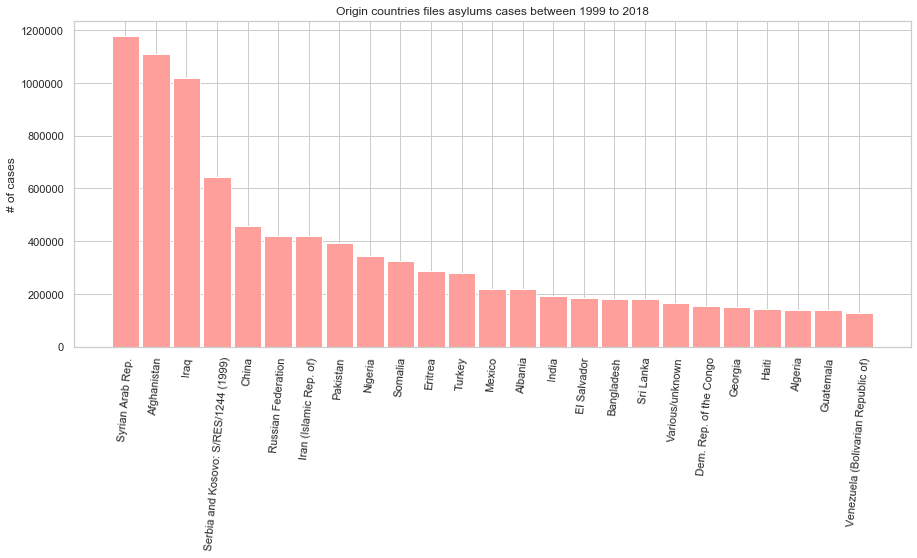

In [32]:
bars = aslymData_orig_ml.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=(15,6))
plt.bar(y_pos,aslymData_orig_ml, color='r',align='center', width=0.9)
plt.title("Origin countries files asylums cases between 1999 to 2018")
plt.xticks(y_pos, bars,rotation=85)
plt.ylabel("# of cases")
plt.show()

In [145]:
aslymData.dtypes


Country / territory of asylum/residence    object
Origin                                     object
Year                                        int64
Month                                      object
Value                                       int64
dtype: object

In [33]:
aslymData_year=aslymData.groupby('Year')['Value'].sum()

In [34]:
yearwise_per = aslymData_year.values/aslymData_year.values[0]

In [35]:
yearwise_per

array([1.        , 1.1197574 , 1.22350235, 1.18314372, 0.9851763 ,
       0.77151037, 0.64666943, 0.58335635, 0.63993462, 0.76140606,
       0.7716778 , 0.74224597, 0.90510364, 0.99545641, 1.21552857,
       1.74705954, 3.44546018, 3.32258443, 2.39579252, 1.35373868])

In [36]:
year_index = aslymData_year.index

In [37]:
dyear = [str(year) for year in year_index]

dyear

['1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018']

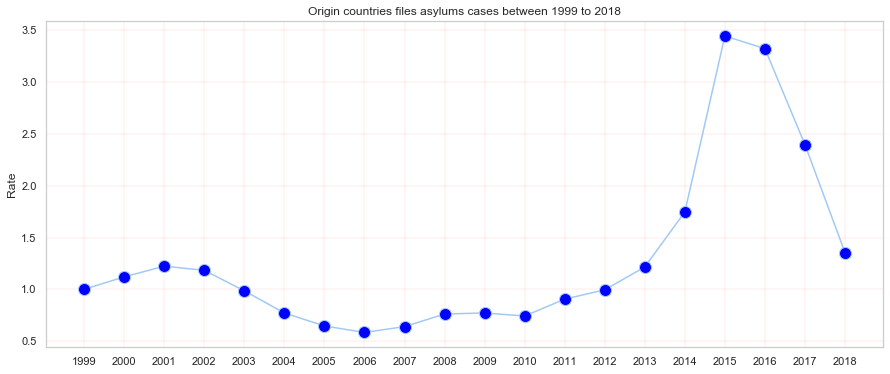

In [38]:
fig = plt.figure(figsize=(15,6))
plt.grid(color='r', linestyle='-', linewidth=.2)
plt.plot(dyear,yearwise_per, color='b',marker='o',
     markerfacecolor='blue', markersize=12)
plt.title("Origin countries files asylums cases between 1999 to 2018")
plt.ylabel("Rate")
plt.show()

In [170]:
aslymData_year

Year
1999     477816
2000     535038
2001     584609
2002     565325
2003     470733
2004     368640
2005     308989
2006     278737
2007     305771
2008     363812
2009     368720
2010     354657
2011     432473
2012     475645
2013     580799
2014     834773
2015    1646296
2016    1587584
2017    1144748
2018     646838
Name: Value, dtype: int64